In [1]:
import pandas as pd
df = pd.read_csv('data/heart.csv')

* age — возраст
* sex — пол (1 - мужчина, 0 - женщина)
* cp — тип боли в груди (4 значения)
* trestbps — артериальное давление в покое
* chol — холестерин сыворотки в мг/дл
* fbs — уровень сахара в крови натощак > 120 мг/дл
* restecg — результаты электрокардиографии в покое (значения 0,1,2)
* thalach — достигнута максимальная частота сердечных сокращений
* exang — стенокардия, вызванная физической нагрузкой
* oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
* slope — наклон пикового сегмента ST при нагрузке
* ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
* thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

8.1 Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.

В ответ введите результат выполнения кода heart['old'].sum().

In [3]:
df['old'] = df['age'].apply(lambda x: 1 if x > 60 else 0)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,0


In [4]:
df['old'].sum()

79

8.2 Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.

Информацию о среднем давлении для возраста и пола возьмите из этой таблицы. В таблице систолическое давление написано первым, перед дробной чертой.
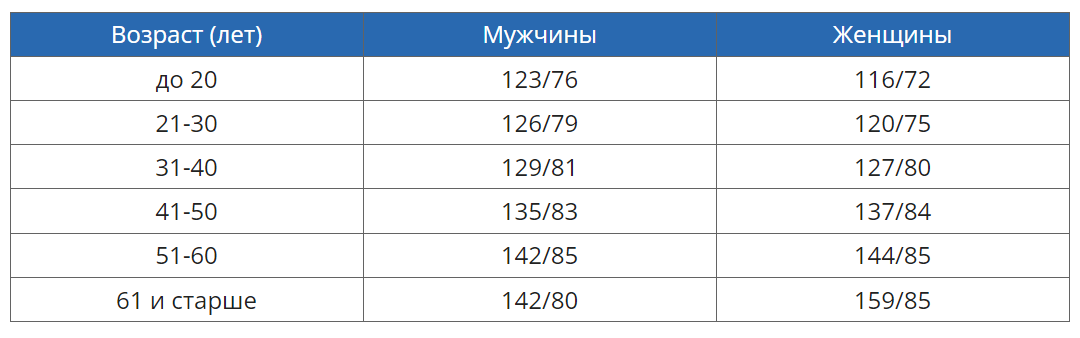

В ответ напишите значение признака trestbps_mean для пациента под номером 300.

In [6]:
def get_trestbps(row):
    if row['sex'] == 1:
        if row['age'] <= 20:
            return 123
        if 20 < row['age'] <= 30:
            return 126
        if  30 < row['age'] <= 40:
            return 129
        if 40 < row['age'] <= 50:
            return 135
        if 50 < row['age'] <= 60:
            return 142
        if row['age'] > 60:
            return 142 
    if row['sex'] == 0:
        if row['age'] <= 20:
            return 116
        if 20 < row['age'] <= 30:
            return 120
        if  30 < row['age'] <= 40:
            return 127
        if 40 < row['age'] <= 50:
            return 137
        if 50 < row['age'] <= 60:
            return 144
        if row['age'] > 60:
            return 159 
df['trestbps_mean'] = df[['age', 'sex']].apply(get_trestbps, axis=1)

In [7]:
df['trestbps_mean'][300]

142

8.3 Проанализируйте датасет и выберите категориальные признаки.

ХЗ чё происходит вообще, в 8.4 мы вообще кодируем признаки, которые и так описаны четырмя цифрами.

8.5 Закодируйте вышеперечисленные признаки методом OneHotEncoding, удалив исходные признаки.

Сколько признаков получилось в датасете?

In [8]:
df_onehot = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'ca', 'thal'])

In [12]:
df_onehot = df_onehot.drop(['cp'], axis=1)
df_onehot = df_onehot.drop(['restecg'], axis=1)
df_onehot = df_onehot.drop(['slope'], axis=1)
df_onehot = df_onehot.drop(['ca'], axis=1)
df_onehot = df_onehot.drop(['thal'], axis=1)

KeyError: "['cp'] not found in axis"

8.6 Нормализуйте все числовые признаки подходящим способом.

В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

In [15]:
# для нормализации, стандартизации
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

In [23]:
col_names = list(df_onehot.columns)
col_numb = col_names[:11]
col_numb

['age',
 'sex',
 'trestbps',
 'chol',
 'fbs',
 'thalach',
 'exang',
 'oldpeak',
 'target',
 'old',
 'trestbps_mean']

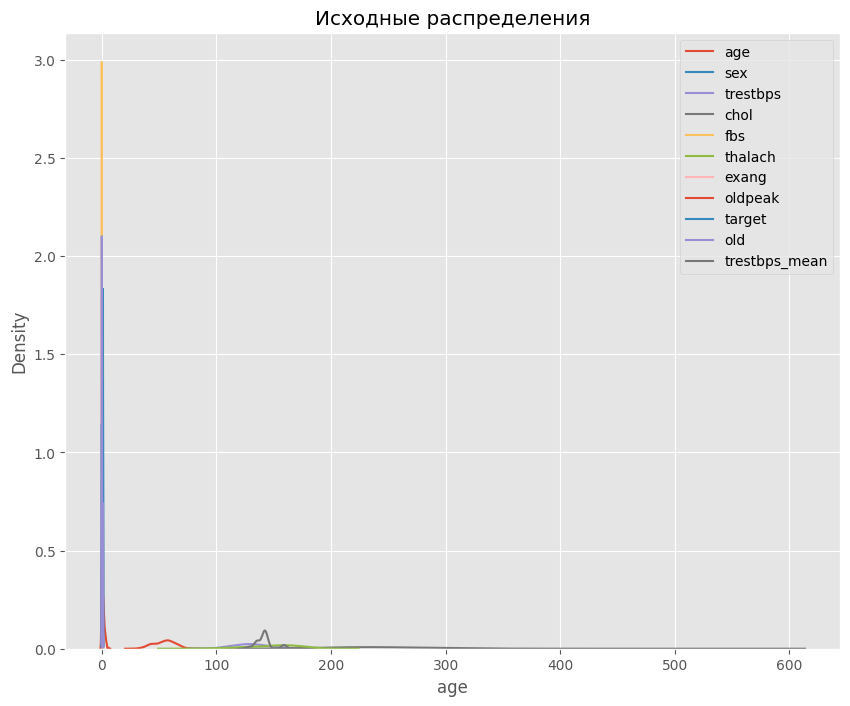

In [24]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
for i in col_numb:
    sns.kdeplot(df[i], ax=ax1, label = i)
    
plt.legend()

In [36]:
col_names2 = list(df_onehot.columns)
col_numb2 = col_names[11:]
col_numb2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   trestbps       303 non-null    int64  
 3   chol           303 non-null    int64  
 4   fbs            303 non-null    int64  
 5   thalach        303 non-null    int64  
 6   exang          303 non-null    int64  
 7   oldpeak        303 non-null    float64
 8   target         303 non-null    int64  
 9   old            303 non-null    int64  
 10  trestbps_mean  303 non-null    int64  
 11  cp_0           303 non-null    uint8  
 12  cp_1           303 non-null    uint8  
 13  cp_2           303 non-null    uint8  
 14  cp_3           303 non-null    uint8  
 15  restecg_0      303 non-null    uint8  
 16  restecg_1      303 non-null    uint8  
 17  restecg_2      303 non-null    uint8  
 18  slope_0   

['cp_0',
 'cp_1',
 'cp_2',
 'cp_3',
 'restecg_0',
 'restecg_1',
 'restecg_2',
 'slope_0',
 'slope_1',
 'slope_2',
 'ca_0',
 'ca_1',
 'ca_2',
 'ca_3',
 'ca_4',
 'thal_0',
 'thal_1',
 'thal_2',
 'thal_3']

In [37]:
df_normal = df_onehot
for i in col_numb2:
    df_normal = df_normal.drop([i], axis=1)

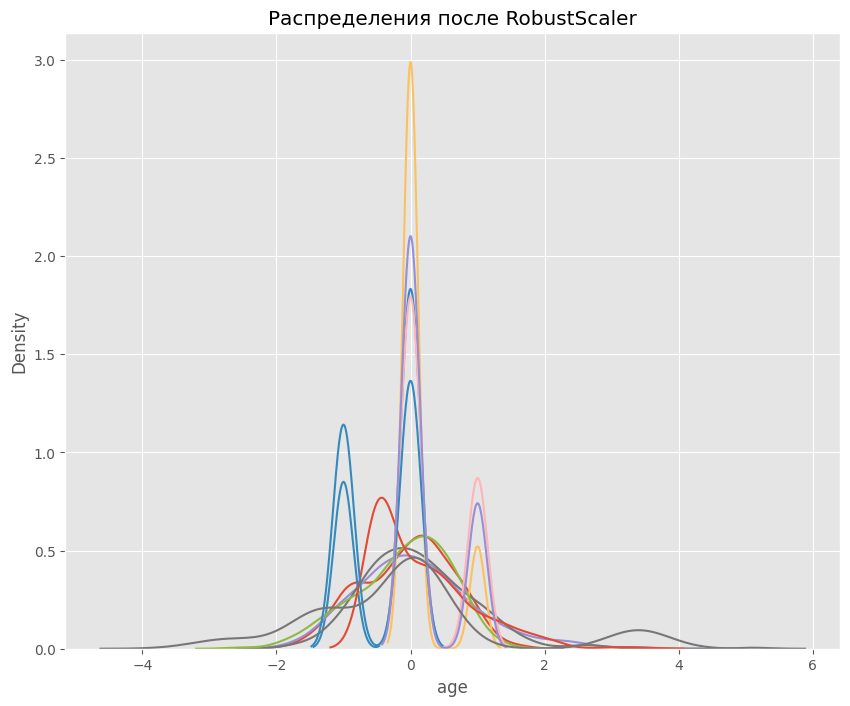

In [38]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
df_r = r_scaler.fit_transform(df_normal)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_r = pd.DataFrame(df_r, columns=col_numb)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после RobustScaler')

for i in col_numb:
    sns.kdeplot(df_r[i], ax=ax1)


In [42]:
round(df_r['chol'].std(), 6)

0.816232

8.7 Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.

<AxesSubplot: >

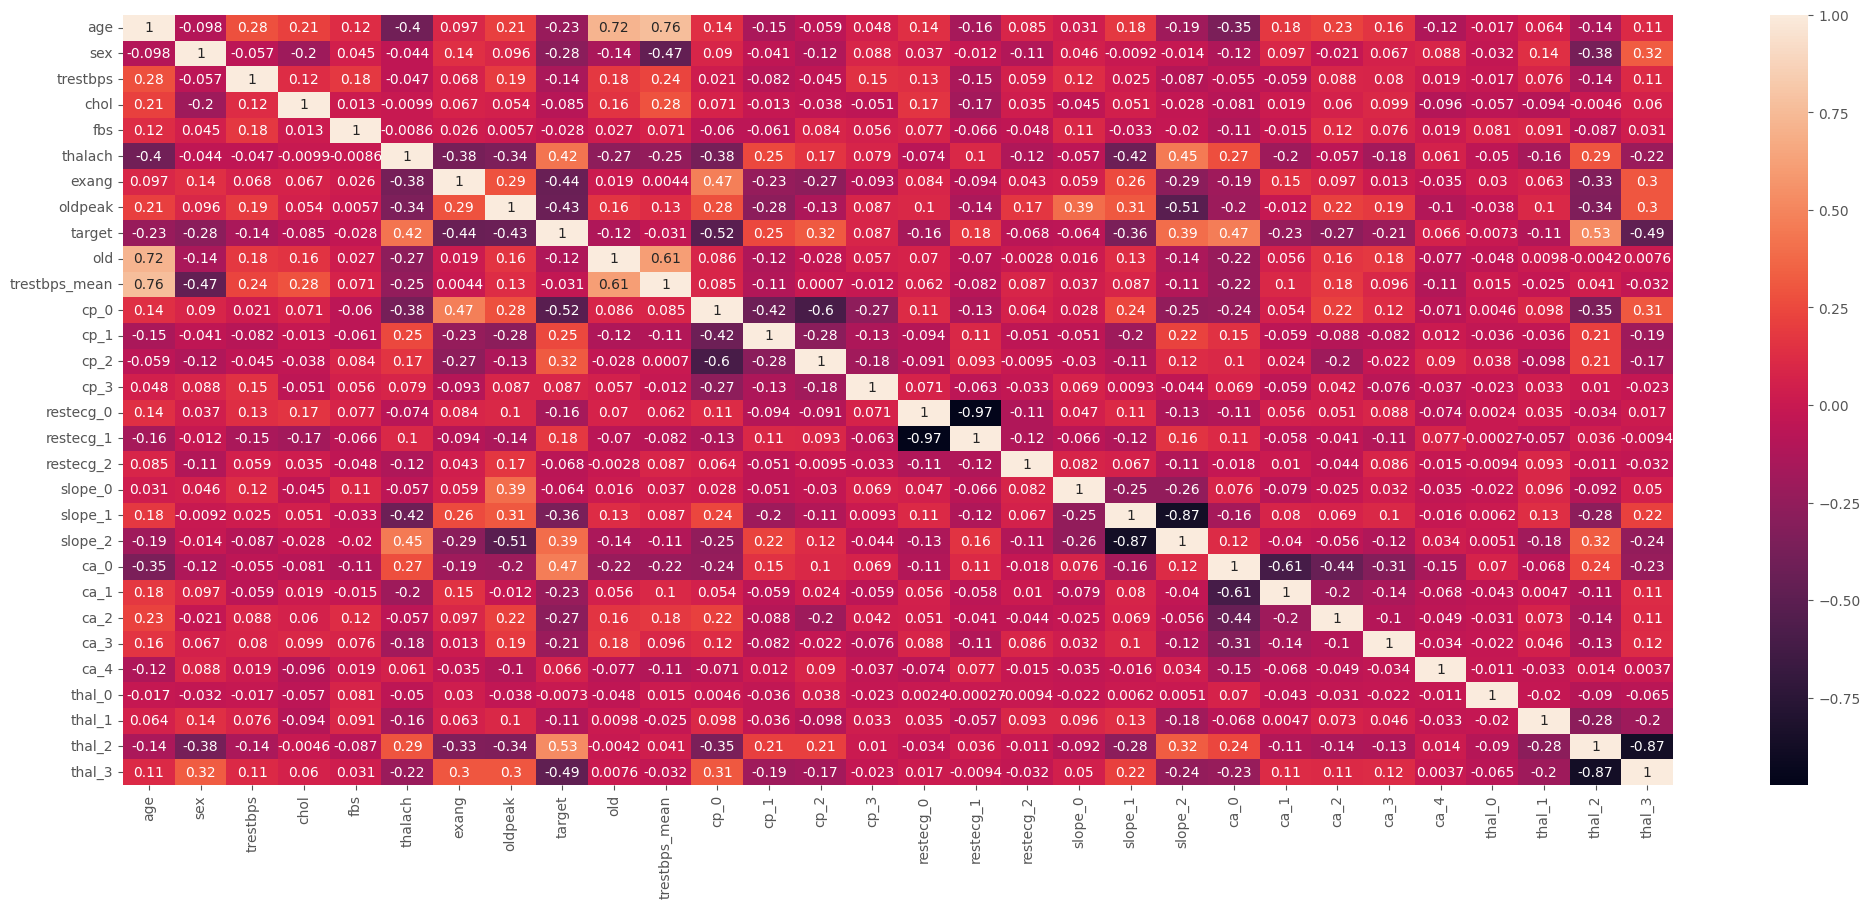

In [46]:
import seaborn as sns # импортируем seaborn для построения графиков
plt.figure(figsize=(25,10))
sns.heatmap(df_onehot.corr(), annot=True) # включаем отображение коэффициентов